# Técnicas Avançadas de Captura e Tratamento de Dados - Semana 4
Tutoria: Fernando Pereira dos Santos

Tema: Análise de Componentes Principais - PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA
from scipy.stats import zscore

# lendo dados da iris. 
iris = load_iris()

X = iris.data
Y = iris.target

print(X.shape)
print(Y.shape)
print(np.unique(Y))

(150, 4)
(150,)
[0 1 2]


# Variância do PCA

0.9246187232017271
0.05306648311706782
0.017102609807929763
0.005212183873275374
2 componentes

 0.977685206318795


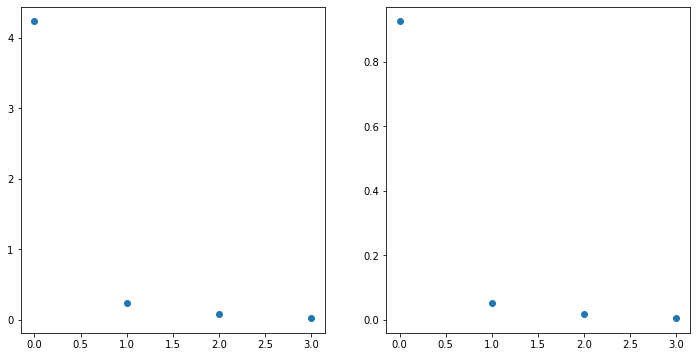

In [2]:
xPCA = PCA(svd_solver='full').fit(X)

plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

# Quantidade de variância por cada uma das componentes selecionadas. 
ax1.plot(xPCA.explained_variance_, 'o')

# Porcentagem da variância de cada uma das componentes selecionadas.
ax2.plot(xPCA.explained_variance_ratio_, 'o')

# Acúmulo de variância das principais componentes
print(xPCA.explained_variance_ratio_[0])
print(xPCA.explained_variance_ratio_[1])
print(xPCA.explained_variance_ratio_[2])
print(xPCA.explained_variance_ratio_[3])

# Considerando as duas primeiras componentes
print("2 componentes\n\n", xPCA.explained_variance_ratio_[0]+xPCA.explained_variance_ratio_[1])

# PCA versus IPCA

In [3]:
# IPCA é uma versão incremental do PCA. 
# Na execução do PCA todos os dados são alocados na memória, algo normal para bases de dados pequenas.
# Contudo, quando a quantidade de dados é maior que a capacidade da memória, PCA não pode ser executado.
# Consequentemente, a implementação IPCA permite que se faça as mesmas operações do PCA, carregando fatias dos dados alternadamente.
# Para isso, o parâmetro batch_size deve ser preenchido, indicando a quantidade de dados carregados por vez.

X_ipca = IncrementalPCA(n_components=2, batch_size=10).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

#primeiro cenário com split X em X_train e X_test
#pca = PCA(n_components=2)
#X_train_result = pca.fit_transform(X_train)
#X_test_result = pca.transform(X_test)

#segundo cenário, novoX com dados coletados no futuro
#pca = PCA(n_components=2)
#X_train_result = pca.fit_transform(X)
#X_novo_test_result = pca.transform(novoX)

#para salvar a matriz de projeção para uso futuro:
#import pickle as pk
#pk.dump(pca, open("pca.pkl","wb"))

#para carregar a matriz de projeção:
#pca_reload = pk.load(open("pca.pkl",'rb'))

print(X_ipca.shape)
print(X_pca.shape)

(150, 2)
(150, 2)


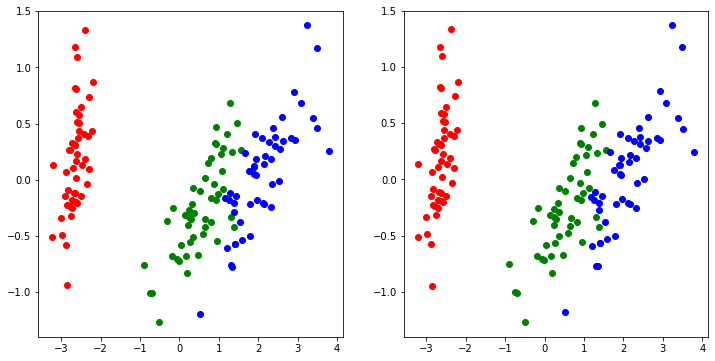

In [4]:
# Comparando a visualização de PCA versus IPCA, sendo exatamente a mesma
plt.figure(figsize=(12, 6))

colors = ['red','green','blue']

plt.subplot(1, 2, 1)
for i in range (0, X_pca.shape[0]):
    plt.scatter(X_pca[i][0], X_pca[i][1], c=colors[Y[i]])

plt.subplot(1, 2, 2)
for i in range (0, X_ipca.shape[0]):
    plt.scatter(X_ipca[i][0], X_ipca[i][1], c=colors[Y[i]])

plt.show()

# Remoção de outliers antes da aplicação do PCA

With possible outliers (150, 2)
Without possible outliers (132, 2)


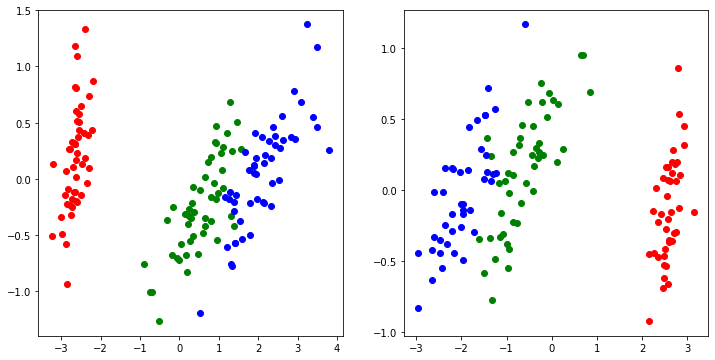

In [5]:
# Remoção de outliers utilizando zscore
outliers = np.abs(zscore(X, axis=0)) > 1.8    

# registro dos exemplos que foram identificados como outliers
outliers_id = np.argwhere(outliers == True)  

# removendo outliers
df = pd.DataFrame(X)
df = df.drop(outliers_id[:,0], axis=0)
X_no_outliers = df.values

df = pd.DataFrame(Y)
df = df.drop(outliers_id[:,0], axis=0)
Y_no_outliers = df.values

# Aplicando PCA ao novo conjunto de dados (sem outliers)
newX = PCA(n_components=2).fit_transform(X_no_outliers)

print("With possible outliers", X_pca.shape)
print("Without possible outliers", newX.shape)

plt.figure(figsize=(12, 6))
colors = ['red','green','blue']

plt.subplot(1, 2, 1)
for i in range (0, X_pca.shape[0]):
    plt.scatter(X_pca[i][0], X_pca[i][1], c=colors[Y[i]])

plt.subplot(1, 2, 2)
for i in range (0, newX.shape[0]):
    plt.scatter(newX[i][0], newX[i][1], c=colors[int(Y_no_outliers[i])])

plt.show()

# Observações importantes

O tamanho do conjunto de dados pode aumentar rapidamente quando trabalhamos com dados não estruturados, como imagens e vídeos, por exemplo. Neste caso, utilizando redes neurais, nós não temos os dados em si. A partir das imagens, a rede neural irá disponibilizar os atributos, que podem ser da ordem de milhares para cada exemplo. Consequentemente, dependendo da quantidade de imagens e atributos, a alocação completa na memória é inviável.

Neste cenário específico, muitos atributos são redundantes e não possuem variância. Então, aplicar técnicas de redução de dimensionalidade pode ser uma boa alternativa para melhorar o espaço de características e reduzir o custo computacional do classificador.

Um detalhe a ser observado é em cenários com treinamento e teste disjuntos. Em muitos datasets (principalmente acadêmicos), os exemplos já são disponibilizados de forma separada. Assim, ao aplicar PCA, por exemplo, no conjunto de treinamento estamos transformando o espaço referente a este conjunto. Consequentemente, se aplicarmos PCA novamente ao conjunto de teste podemos ter outro espaço completamente diferente. Assim, uma alternativa mais confiável é:

pca = PCA(n_components=n_components)

X_pca_train = pca.fit_transform(X_train)

X_pca_test = pca.transform(X_test)

Aqui, estamos utilizando a combinação linear encontrada no conjunto de treinamento e aplicando-a ao conjunto de teste. Portanto, o conjunto de teste é transformado seguindo as diretrizes definidas pelo conjunto de treinamento.



